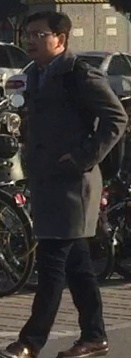

torch.Size([1, 3, 358, 131])


In [67]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

image = Image.open('../MSMT17_V1/test/0000/0000_012_01_0303morning_0021_0.jpg')
display(image)
x = TF.to_tensor(image)
x.unsqueeze_(0)
print(x.shape)




In [21]:
class RandomErasing(object):
    """ Randomly selects a rectangle region in an image and erases its pixels.
        'Random Erasing Data Augmentation' by Zhong et al.
        See https://arxiv.org/pdf/1708.04896.pdf
    Args:
         probability: The probability that the Random Erasing operation will be performed.
         sl: Minimum proportion of erased area against input image.
         sh: Maximum proportion of erased area against input image.
         r1: Minimum aspect ratio of erased area.
         mean: Erasing value.
    """

    def __init__(self, probability=0.5, sl=0.02, sh=0.4, r1=0.3, mean=(0.4914, 0.4822, 0.4465)):
        self.probability = probability
        self.mean = mean
        self.sl = sl
        self.sh = sh
        self.r1 = r1

    def __call__(self, img):

        if random.uniform(0, 1) >= self.probability:
            return img

        for attempt in range(100):
            area = img.size()[1] * img.size()[2]

            target_area = random.uniform(self.sl, self.sh) * area
            aspect_ratio = random.uniform(self.r1, 1 / self.r1)

            h = int(round(math.sqrt(target_area * aspect_ratio)))
            w = int(round(math.sqrt(target_area / aspect_ratio)))

            if w < img.size()[2] and h < img.size()[1]:
                x1 = random.randint(0, img.size()[1] - h)
                y1 = random.randint(0, img.size()[2] - w)
                if img.size()[0] == 3:
                    img[0, x1:x1 + h, y1:y1 + w] = self.mean[0]
                    img[1, x1:x1 + h, y1:y1 + w] = self.mean[1]
                    img[2, x1:x1 + h, y1:y1 + w] = self.mean[2]
                else:
                    img[0, x1:x1 + h, y1:y1 + w] = self.mean[0]
                return img

        return img


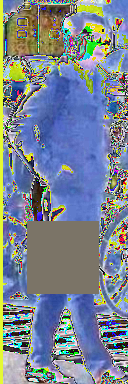

In [75]:
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import random
import math



SIZE_TRAIN =[384, 128]
PROB = 0.5
PADDING = 10
RE_PROB = 0.5
PIXEL_MEAN = [0.485, 0.456, 0.406]
PIXEL_STD = [0.229, 0.224, 0.225]

transform = T.Compose([
    T.Resize(SIZE_TRAIN),
    T.RandomHorizontalFlip(p=PROB),
    T.Pad(PADDING),
    T.RandomCrop(SIZE_TRAIN),
    T.ToTensor(),
    T.Normalize(mean=PIXEL_MEAN, std=PIXEL_STD),
    RandomErasing(probability=RE_PROB, mean=PIXEL_MEAN)
])

trimg = transform(image)
trimage=TF.to_pil_image(trimg, mode=None)
display(trimage)

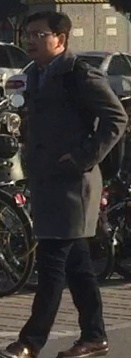

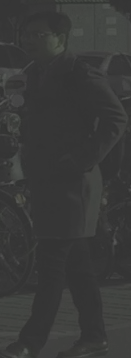

In [113]:
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import random
import math



SIZE_TRAIN =[384, 128]
PROB = 0.5
PADDING = 10
RE_PROB = 0.5
PIXEL_MEAN = [0.485, 0.456, 0.406]
PIXEL_STD = [0.229, 0.224, 0.225]

transform = T.Compose([

    T.ColorJitter(brightness=[1.0,1.0], contrast=[0.1,1.0], saturation=[0.5,1.0], hue=[-0.5,0.5]),
])
trimg = transform(image)

display(image,trimg)


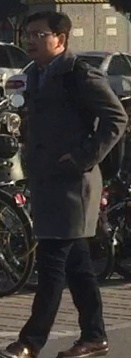

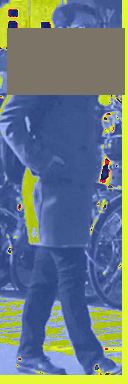

In [70]:
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import random
import math



SIZE_TRAIN =[384, 128]
PROB = 0.5
PADDING = 10
RE_PROB = 0.5
PIXEL_MEAN = [0.485, 0.456, 0.406]
PIXEL_STD = [0.229, 0.224, 0.225]

transform = T.Compose([
    T.Resize(SIZE_TRAIN),
    T.RandomHorizontalFlip(p=PROB),
    T.ColorJitter(brightness=[0.3,0.7], contrast=[0.3,0.7], saturation=[0.3,0.7], hue=[-0.5,0.5]),
    T.Pad(PADDING),
    T.RandomCrop(SIZE_TRAIN),
    T.ToTensor(),
    T.Normalize(mean=PIXEL_MEAN, std=PIXEL_STD),
    RandomErasing(probability=RE_PROB, mean=PIXEL_MEAN)
])
trimg = transform(image)
trimage=TF.to_pil_image(trimg, mode=None)
display(image,trimage)
